In [1]:
%load_ext autoreload
# %load_ext memory_profiler
%autoreload 2
%matplotlib inline
from context import planvec

In [24]:
import os
from planvec import img_proc
from planvec.common import PROJECT_ROOT_PATH
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [38]:
ASSETS_DIR = os.path.join(PROJECT_ROOT_PATH, 'test', 'assets')
INPUT_IMAGE = 'planvecinner.jpg'
OUTPUT_PDF_NAME = 'sample_output.pdf'

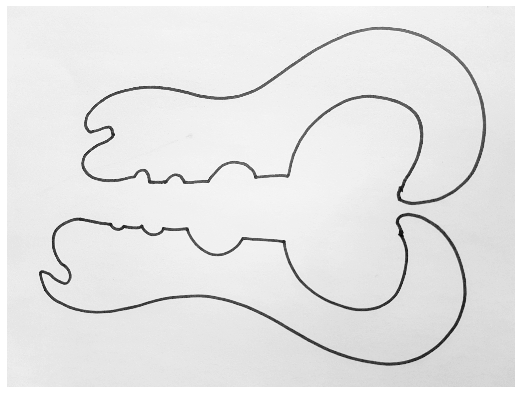

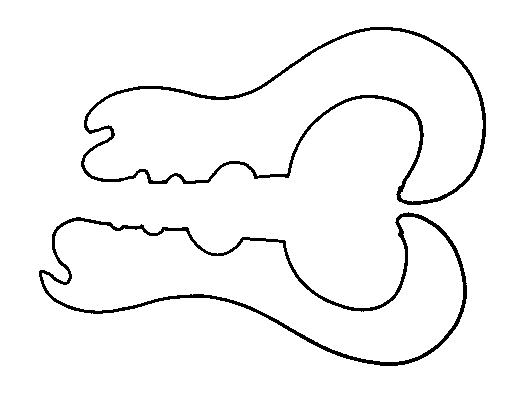

In [43]:
# Read the input image
img = img_proc.read_img(ASSETS_DIR, INPUT_IMAGE)

# Process and plot image
img = img_proc.img_to_greyscale(img)
img = img_proc.add_gaussian_blur(img, 5, 5)
img_proc.imshow_grey(img, figsize=(10,7))
img_thresh = img_proc.thresh_img(img, thresh_val=185, max_val=255, thresh_type=cv2.THRESH_BINARY)
img_proc.imshow_grey(img_thresh, figsize=(10,7))

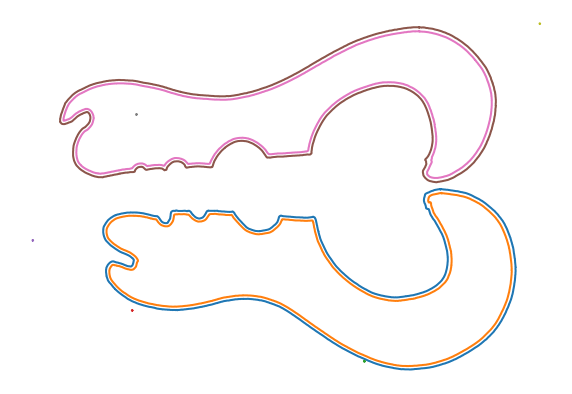

In [71]:
# Find and plots contours
contours = img_proc.find_contours(img_thresh, 254.9)
img_proc.plot_contours(contours)

In [72]:
from skimage import measure

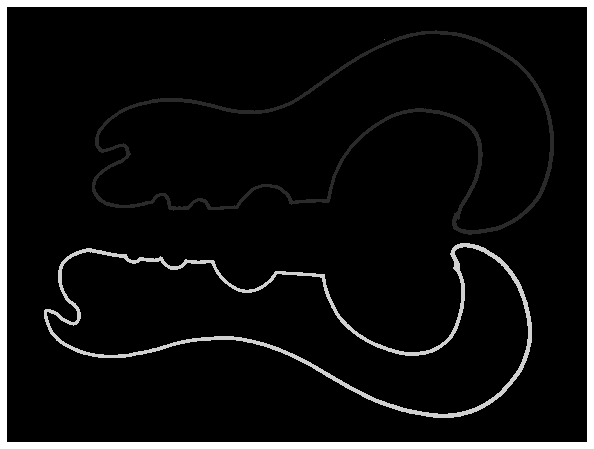

In [97]:
labelled_img, n = measure.label(img_thresh, background=255, return_num=True)
regions = measure.regionprops(labelled_img)
img_proc.imshow_grey(labelled)

In [98]:
labelled_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
for region in regions:
    print(region.convex_area)

3396190
17
8
2
3212363
4
2


In [47]:
# Stores the processed image to a PDF in the assets directory
img_proc.img_to_pdf(os.path.join(ASSETS_DIR, OUTPUT_PDF_NAME), img_thresh)

Stored image pdf at /home/matthaeus/cybathlon/planvec/test/assets/sample_output.pdf


In [49]:
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

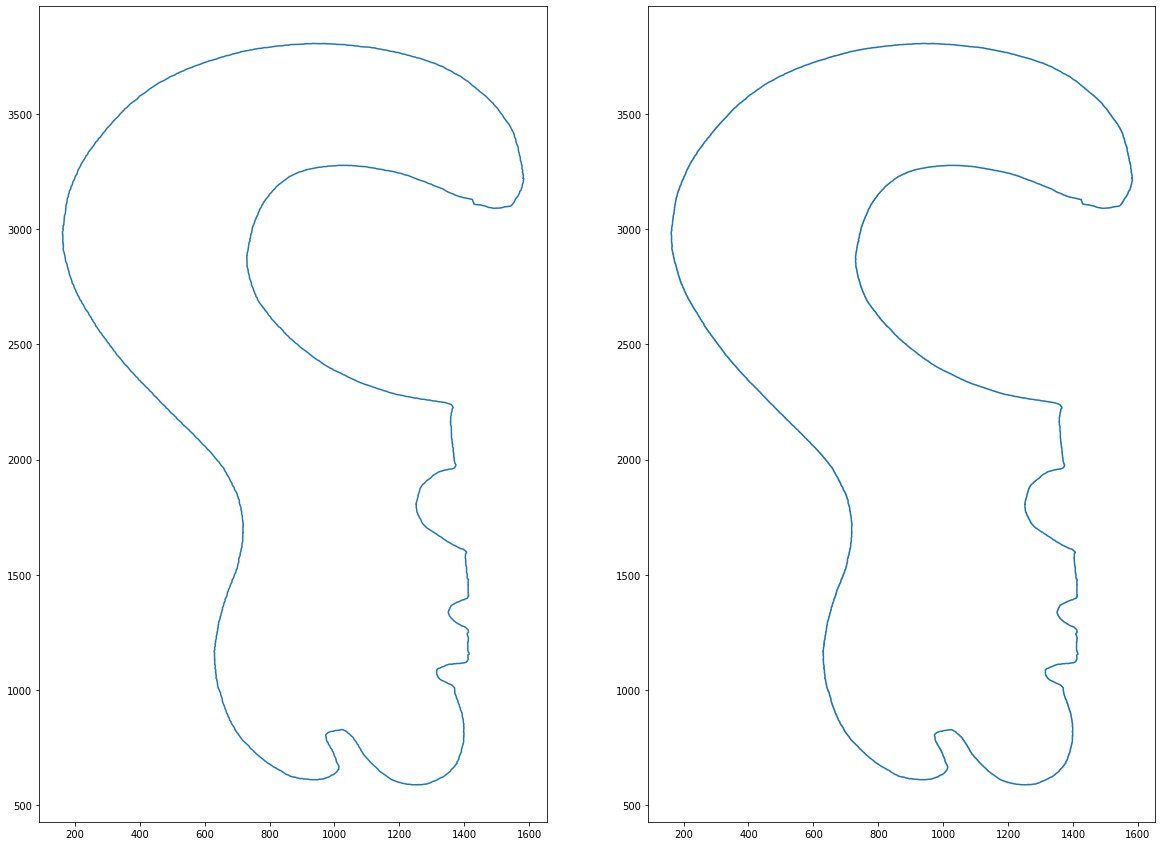

In [63]:
contour = contours[0]
new_s = contour.copy()
appr_s = approximate_polygon(new_s, tolerance=0.8)
  
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 15))
ax2.plot(contour[:, 0], contour[:, 1])
ax1.plot(appr_s[:, 0], appr_s[:, 1])